**Group 17 Olympic Dataset from 1896 Project**

In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


In [ ]:
#Installing packages

# For skopt routines
! pip install scikit-optimize

# For plotting skopt results
! pip install 'scikit-optimize[plots]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/olympic_dataset.csv')

Data Preprocessing

In [ ]:
df['total_medals']=df['total_medals'].astype(str)
df['s_gold']=df['s_gold'].astype(str)
df['summer_total']=df['summer_total'].astype(str)
df['total_gold']=df['total_gold'].astype(str)

In [ ]:
df= df.replace(',','', regex=True)

In [ ]:
df['total_medals']=df['total_medals'].replace(',', '')

In [ ]:
df['total_medals']=df['total_medals'].astype(str).astype(int)
df['s_gold']=df['s_gold'].astype(str).astype(int)
df['summer_total']=df['summer_total'].astype(str).astype(int)
df['total_gold']=df['total_gold'].astype(str).astype(int)

Data Exploration and Visualization

In [ ]:
df.head(3)

,Team(IOC Code),summer_rank,s_gold,s_silver,s_bronze,summer_total,winter_rank,w_gold,w_silver,w_bronze,winter_total,overall_rank,total_gold,total_silver,total_bronze,total_medals
0,Afghanistan (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,Algeria (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,Argentina (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74


In [ ]:
df.shape

(152, 16)

In [ ]:
len(df)

152

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team(IOC Code)  152 non-null    object
 1   summer_rank     152 non-null    int64 
 2   s_gold          152 non-null    int64 
 3   s_silver        152 non-null    int64 
 4   s_bronze        152 non-null    int64 
 5   summer_total    152 non-null    int64 
 6   winter_rank     152 non-null    int64 
 7   w_gold          152 non-null    int64 
 8   w_silver        152 non-null    int64 
 9   w_bronze        152 non-null    int64 
 10  winter_total    152 non-null    int64 
 11  overall_rank    152 non-null    int64 
 12  total_gold      152 non-null    int64 
 13  total_silver    152 non-null    int64 
 14  total_bronze    152 non-null    int64 
 15  total_medals    152 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 19.1+ KB


In [ ]:
df.describe()

,summer_rank,s_gold,s_silver,s_bronze,summer_total,winter_rank,w_gold,w_silver,w_bronze,winter_total,overall_rank,total_gold,total_silver,total_bronze,total_medals
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,13.953947,33.657895,33.421053,36.098684,103.177632,6.901316,6.986842,6.967105,6.907895,20.861842,20.855263,40.644737,40.388158,43.006579,124.039474
std,7.263570,99.490630,83.156640,80.130585,260.993824,7.632937,20.570018,20.013710,18.638192,58.743358,13.579010,113.606467,97.470597,93.548691,302.885502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,1.000000,2.000000
50%,14.000000,3.000000,4.000000,6.000000,13.000000,4.500000,0.000000,0.000000,0.000000,0.000000,16.000000,3.000000,4.000000,6.000000,13.500000
75%,18.250000,23.000000,27.750000,29.500000,86.250000,10.250000,1.000000,2.000000,1.000000,4.500000,27.250000,26.500000,31.000000,32.500000,91.750000
max,28.000000,1022.000000,795.000000,706.000000,2523.000000,23.000000,132.000000,125.000000,111.000000,368.000000,51.000000,1127.000000,907.000000,794.000000,2828.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b7c3b60d0>,
      dtype=object)

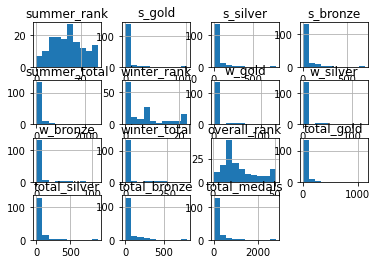

In [ ]:
df.hist()

In [ ]:
df['Team(IOC Code)'].unique

<bound method Series.unique of 0                                  Afghanistan (AFG)
1                                      Algeria (ALG)
2                                    Argentina (ARG)
3                                      Armenia (ARM)
4                            Australasia (ANZ) [ANZ]
                           ...                      
147                               Zambia (ZAM) [ZAM]
148                             Zimbabwe (ZIM) [ZIM]
149         Independent Olympic Athletes (IOA) [IOA]
150     Independent Olympic Participants (IOP) [IOP]
151                           Mixed team (ZZX) [ZZX]
Name: Team(IOC Code), Length: 152, dtype: object>

In [ ]:
px.scatter(data_frame = df, x = 'summer_rank', y = 'winter_rank', color = 'Team(IOC Code)', size = 'overall_rank',
          labels = {'summer_rank': 'Summer Rank', 'winter_rank': 'Winter Rank'}, title = 'Summer Rank vs. Winter Rank')

**Which countries has the most gold medals in history?**

In [ ]:
df.groupby('Team(IOC Code)')['total_gold'].max().sort_values(ascending=False).head(3)

Team(IOC Code)
 United States (USA) [P] [Q] [R] [Z] [F]    1127
 Soviet Union (URS) [URS]                    473
 Germany (GER) [GER] [Z]                     283
Name: total_gold, dtype: int64

**Which countries has the least gold medals in history?**

In [ ]:
df.groupby('Team(IOC Code)')['total_gold'].max().sort_values(ascending=True).head(3)

Team(IOC Code)
 North Macedonia (MKD)    0
 Gabon (GAB)              0
 Ghana (GHA) [GHA]        0
Name: total_gold, dtype: int64

Top 10 countries Gold Comparison

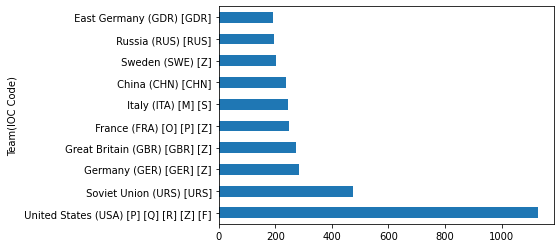

In [ ]:
df.groupby('Team(IOC Code)')['total_gold'].max().sort_values(ascending=False).head(10).plot(kind='barh')

**Heatmap**

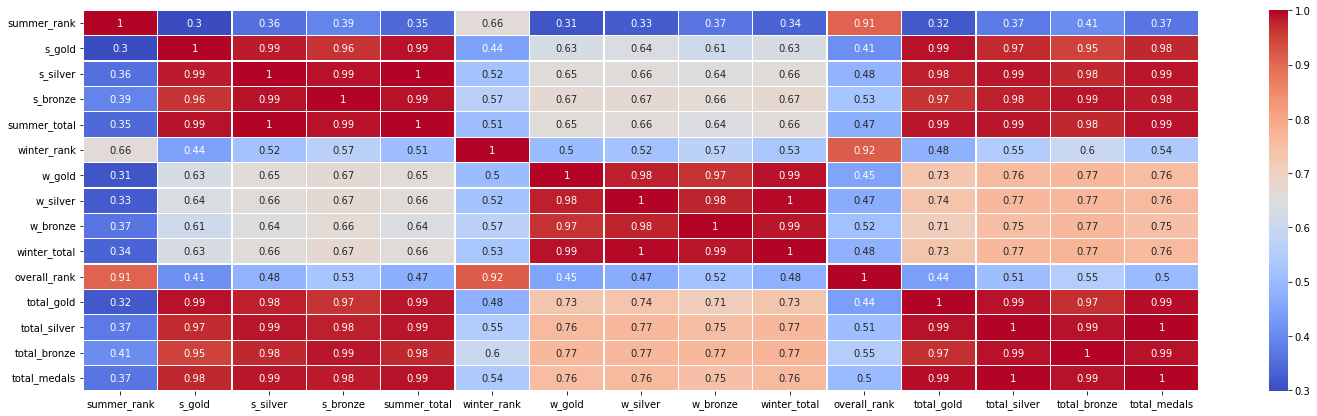

In [ ]:
plt.figure(figsize=(25,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.3,cmap="coolwarm")

<Figure size 1800x504 with 0 Axes>

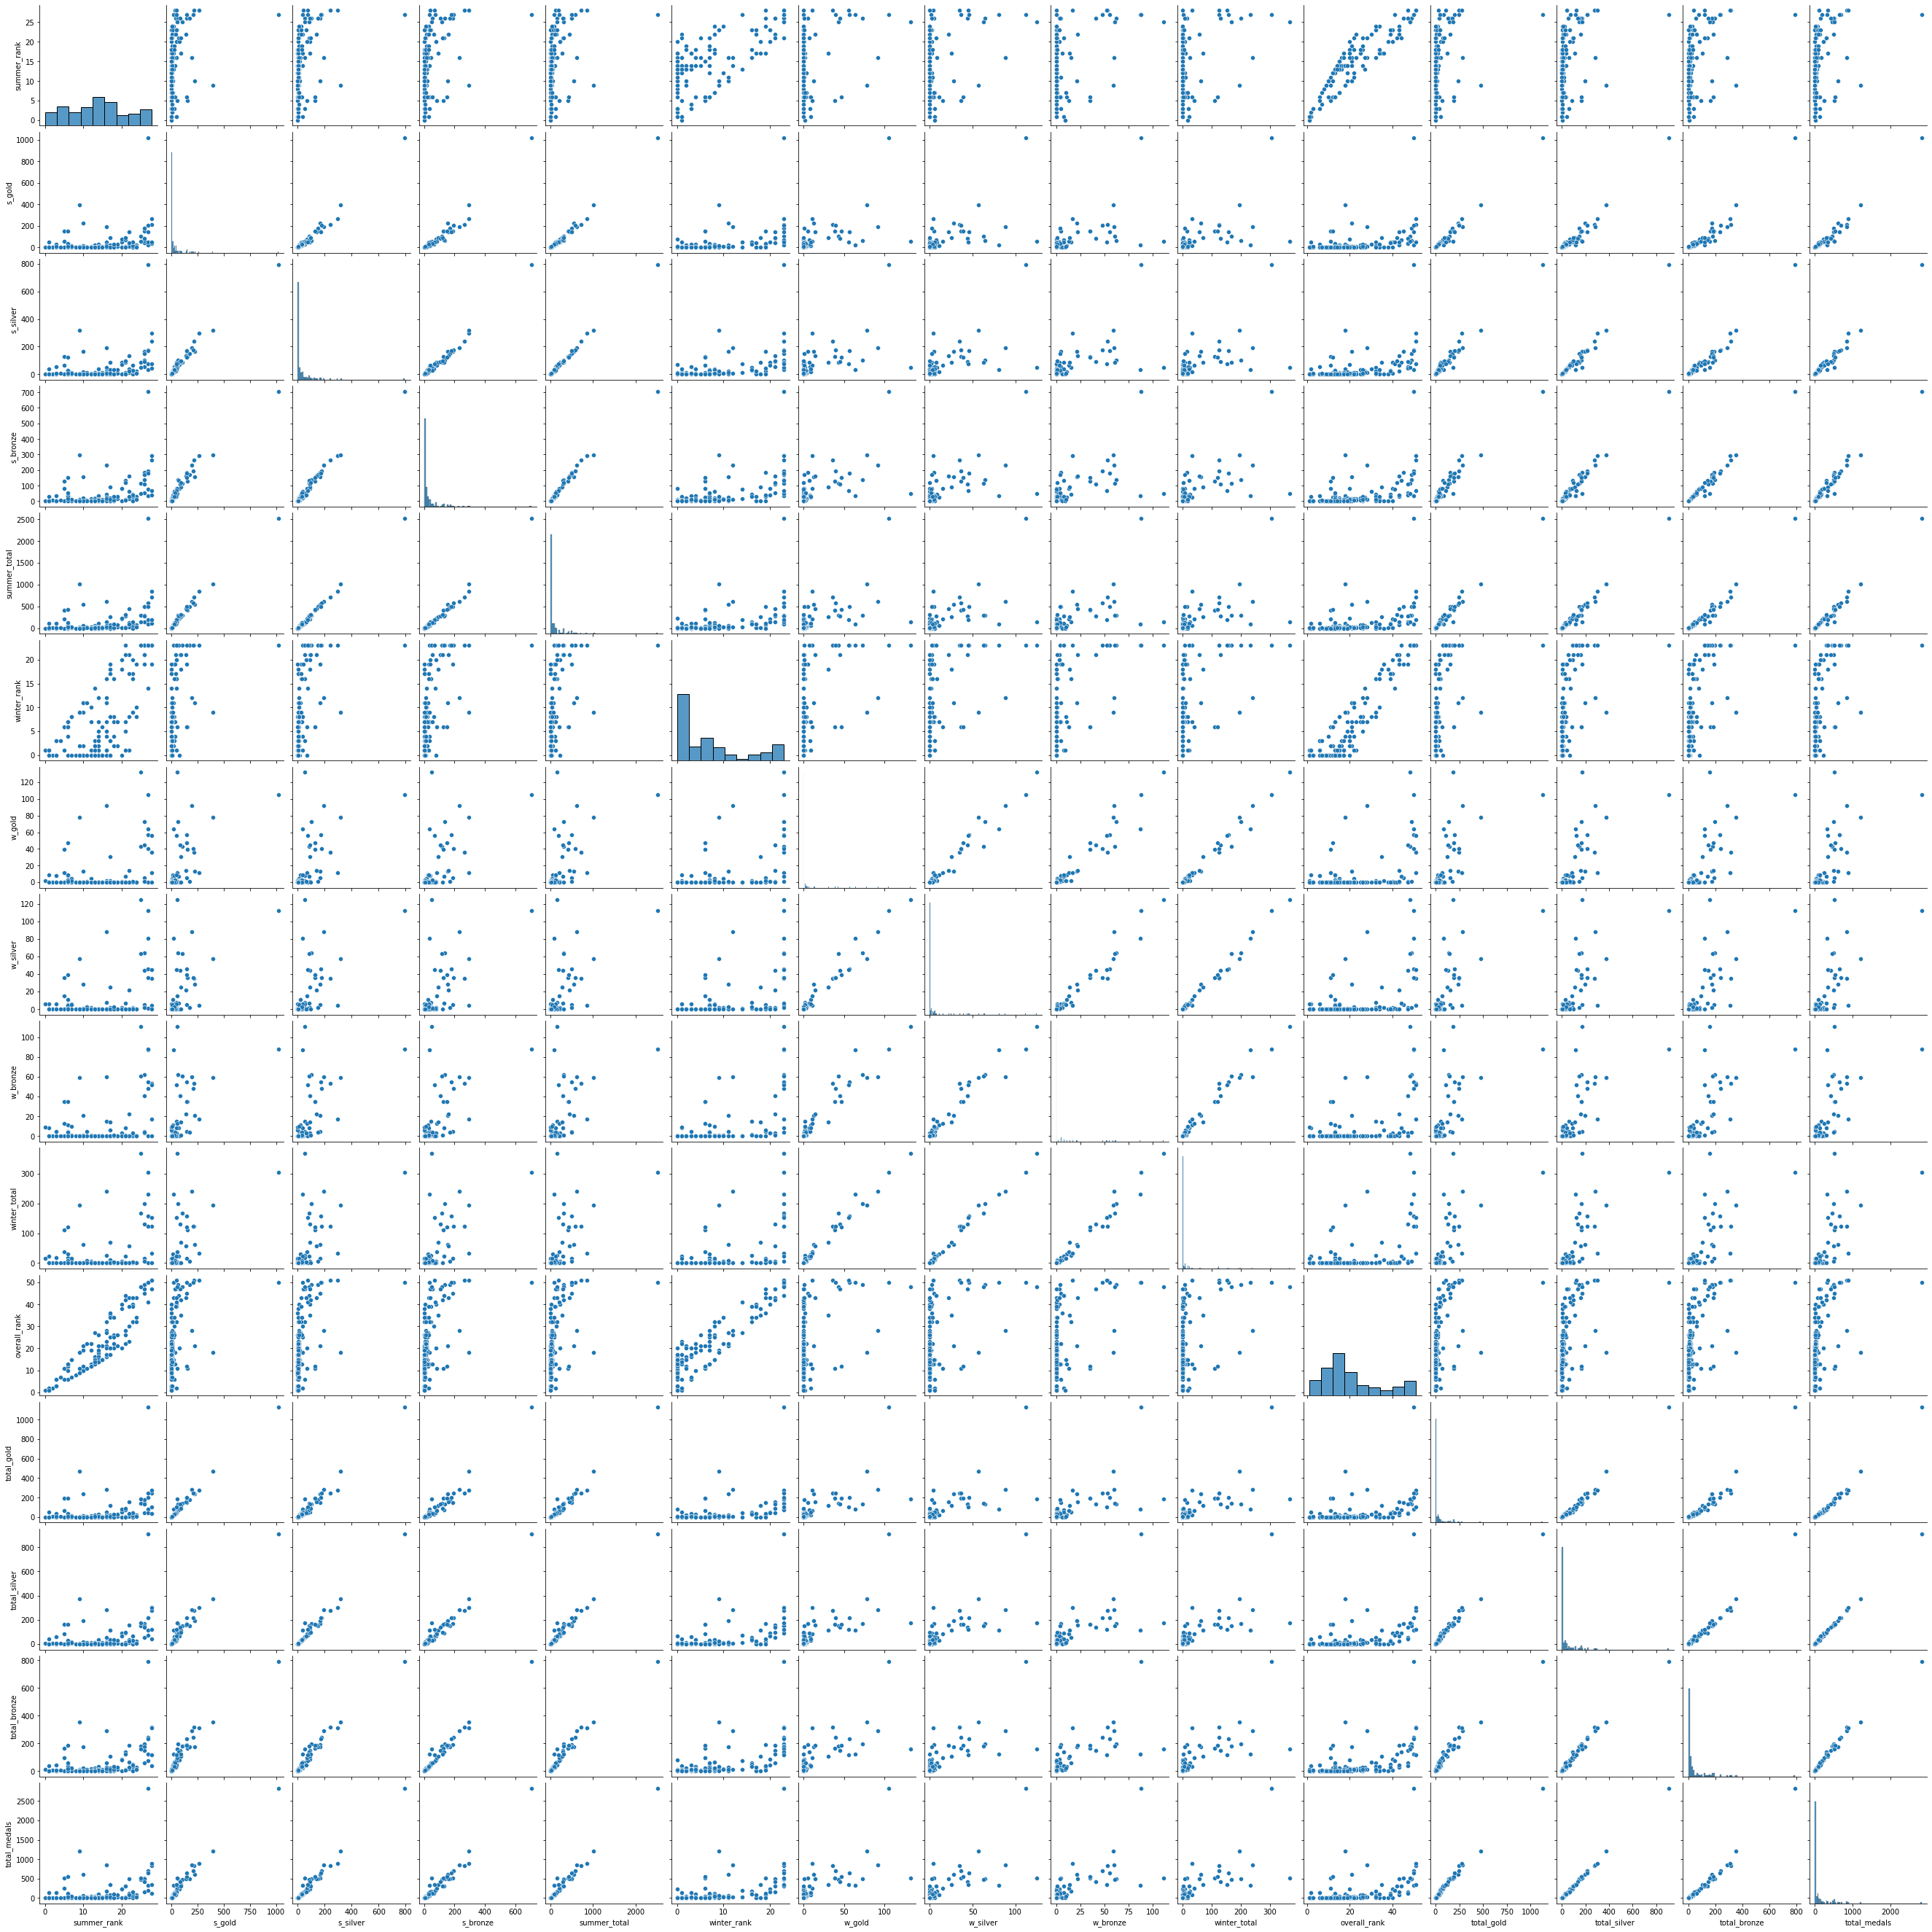

In [ ]:
plt.figure(figsize=(25,7))
sns.pairplot(df)

Top 15 Total Medal Scores Visualization

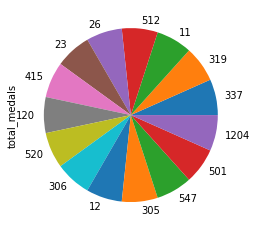

In [ ]:
df["total_medals"].value_counts().nsmallest(15).plot(kind="pie")

Feature Engineering

In [ ]:
#Imputation
print(df.isnull().sum())

Team(IOC Code)    0
summer_rank       0
s_gold            0
s_silver          0
s_bronze          0
summer_total      0
winter_rank       0
w_gold            0
w_silver          0
w_bronze          0
winter_total      0
overall_rank      0
total_gold        0
total_silver      0
total_bronze      0
total_medals      0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
pipe = Pipeline([('labenc', labelenc()),('skew_dummies', skew_dummies(skew=1)),])

NameError: ignored